In [5]:
# Exercise 1
# Import necessary libraries
from sklearn.datasets import load_iris  # For loading the Iris dataset
from sklearn.feature_selection import SelectKBest, chi2  # For feature selection

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
# X contains the feature data (4 features for each sample)
# y contains the target labels (3 different iris species)

# Use SelectKBest with chi2 to select the top 2 features
# chi2 is used because it's suitable for non-negative features (like in the Iris dataset)
# k=2 means we want to select the 2 best features
selector = SelectKBest(chi2, k=2)

# Fit the selector to our data and transform the features
# This step both identifies the best features and returns a new dataset with only those features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
# get_support() returns a boolean mask of selected features
# indices=True means we want the indices instead of the boolean mask
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
# We use a list comprehension to get the names of the selected features
# iris.feature_names contains the names of all features
selected_feature_names = [iris.feature_names[i] for i in selected_feature_indices]
print("Selected features:", selected_feature_names)

# Note: The selected features may vary slightly due to the nature of the chi2 test
# and the specific implementation in sklearn, but they should generally be consistent

Selected features: ['petal length (cm)', 'petal width (cm)']


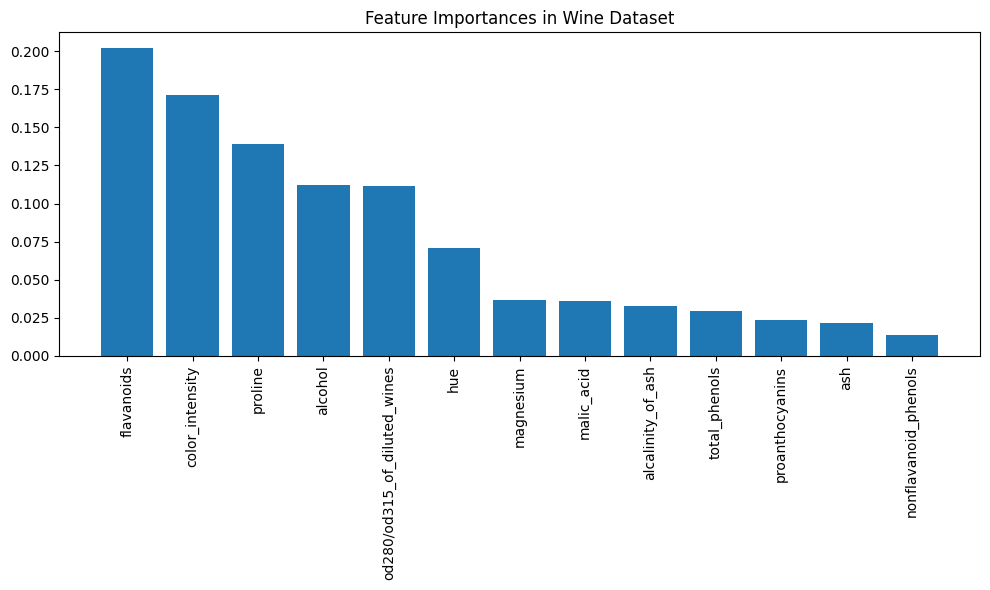

In [7]:
# Exercise 2
# Import necessary libraries
from sklearn.datasets import load_wine  # For loading the Wine dataset
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.ensemble import RandomForestClassifier  # For creating a Random Forest model
import matplotlib.pyplot as plt  # For data visualization

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
# X contains the feature data (13 features for each wine sample)
# y contains the target labels (3 different wine classes)

# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
# n_estimators=100 means we're using 100 trees in our forest
# random_state=42 ensures reproducibility of the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)  # Train the model on our training data

# Get feature importances
# feature_importances_ is an attribute of the trained Random Forest model
# It provides a score for each feature, where higher scores indicate more important features
importances = rf_classifier.feature_importances_
feature_names = wine.feature_names  # Get the names of the features from our dataset

# Sort features by importance
# zip() pairs up the importance scores with their corresponding feature names
# sorted() orders these pairs from highest importance to lowest
feature_importance = sorted(zip(importances, feature_names), reverse=True)

# Visualize feature importances
plt.figure(figsize=(10, 6))  # Create a new figure with specified size
# Create a bar plot of feature importances
plt.bar(range(len(importances)), [imp for imp, _ in feature_importance])
# Set the x-tick labels to be the feature names, rotated 90 degrees for readability
plt.xticks(range(len(importances)), [name for _, name in feature_importance], rotation=90)
plt.title("Feature Importances in Wine Dataset")  # Set the title of the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()  # Display the plot

# Note: The exact feature importances may vary slightly each time you run the code
# due to the random nature of the Random Forest algorithm, even with a set random_state.
# However, the general trend of which features are more important should remain consistent.

In [8]:
# Exercise 3
# Import necessary libraries
from sklearn.datasets import load_breast_cancer  # For loading the Breast Cancer dataset
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination
from sklearn.svm import SVC  # For Support Vector Classification
from sklearn.metrics import accuracy_score  # For evaluating model performance

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
# X contains the feature data (30 features for each sample)
# y contains the target labels (0 for malignant, 1 for benign)

# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
# We use a linear kernel for simplicity and interpretability
svm = SVC(kernel="linear")

# Use Recursive Feature Elimination (RFE) to select features
# estimator=svm: RFE will use our SVM classifier to evaluate feature importance
# n_features_to_select=10: We want to select the 10 most important features
# step=1: At each iteration, RFE will consider removing 1 feature
rfe = RFE(estimator=svm, n_features_to_select=10, step=1)

# Fit RFE on the training data and transform both training and test data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train an SVM model with the selected features
svm.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_rfe)

# Evaluate the model's accuracy
# accuracy_score compares the true labels (y_test) with the predicted labels (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the selected features
# rfe.support_ is a boolean mask of selected features
# We use a list comprehension to get the names of the selected features
print("Selected features:", [cancer.feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]])

# Print the model's accuracy
print("Model accuracy:", accuracy)

# Note: The exact features selected and the model accuracy may vary slightly
# each time you run the code, due to the random nature of the train-test split.
# However, the general performance and most important features should remain consistent.

Selected features: [np.str_('mean radius'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('texture error'), np.str_('worst radius'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry')]
Model accuracy: 0.9736842105263158


In [4]:
# Exercise 4
# Import necessary libraries
from sklearn.datasets import load_diabetes  # For loading the Diabetes dataset
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import Lasso  # For Lasso regression (L1 regularization)
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
# X contains the feature data (10 features for each sample)
# y contains the target variable (a quantitative measure of disease progression one year after baseline)

# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso regression
# alpha=0.1 is the regularization strength; larger values specify stronger regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)  # Train the Lasso model on the training data

# Get selected features
# Lasso can shrink coefficients to exactly zero, effectively performing feature selection
# We create a list of features whose coefficients are non-zero
selected_features = [diabetes.feature_names[i] for i in range(len(lasso.coef_)) if lasso.coef_[i] != 0]

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
# Mean Squared Error (MSE) measures the average squared difference between predicted and actual values
mse = mean_squared_error(y_test, y_pred)

# R-squared (R2) score measures the proportion of variance in the dependent variable predictable from the independent variable(s)
# R2 ranges from 0 to 1, where 1 indicates perfect prediction
r2 = r2_score(y_test, y_pred)

# Print results
print("Selected features:", selected_features)
print("Mean squared error:", mse)
print("R-squared score:", r2)

# Note: The exact features selected and the model performance metrics may vary slightly
# each time you run the code, due to the random nature of the train-test split.
# However, the general performance and most important features should remain consistent.

# Also note: Lasso regression is performing both feature selection and regularization.
# It tends to prefer solutions with fewer non-zero coefficients, effectively reducing
# the number of features upon which the given solution is dependent.

Selected features: ['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']
Mean squared error: 2798.1934851697188
R-squared score: 0.4718547867276227
